In [1]:
#Importing the necessary libraries required for analysis and Model Building

In [2]:
import numpy as np
import pandas as pd 
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [3]:
#Lets load the data 

In [4]:
data=pd.read_csv("score.csv",delimiter=',')

In [5]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#As we can see their is not a lot of data available 

In [9]:
#Distributing the data 

In [10]:
X_train,X_test,y_train,y_test=train_test_split(data['Hours'],data['Scores'],test_size=0.2,random_state=101)

In [11]:
#Now visualising the training data

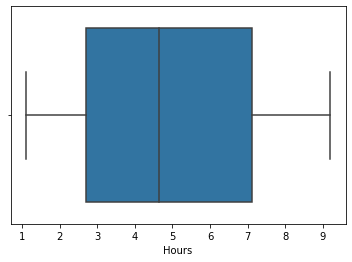

In [12]:
sns.boxplot(X_train)

In [13]:
#Box plot clearly shows no outlier in X_train

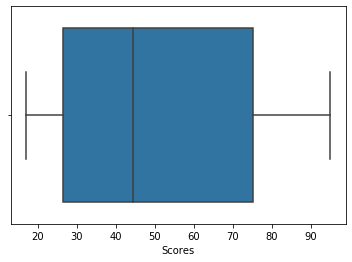

In [14]:
sns.boxplot(y_train)

In [15]:
#No outlier in y_train as well 

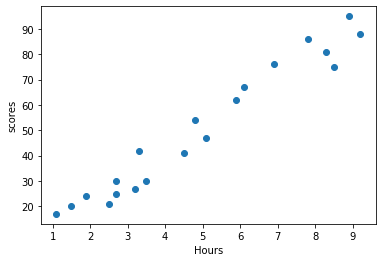

In [16]:
plt.scatter(X_train,y_train)
plt.xlabel("Hours")
plt.ylabel('scores')
plt.show()

In [17]:
#With this we come to an end of analyzing our data as the data is very less with 2 features so there is no deep analysis required. 

In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection  import KFold
from sklearn.metrics import mean_absolute_error

In [19]:
scores={} #This score dictionary consist of score of every model we imported above

In [20]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [21]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['Linear Regression']=[s,error,val]

In [23]:
lr=Lasso()
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['Lasso']=[s,error,val]

In [24]:
lr=Ridge()
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['Ridge']=[s,error,val]

In [25]:
lr=SVR(kernel='linear')
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['SVR']=[s,error,val]

E:\Utkarsh\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
lr=RandomForestRegressor()
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['RandomForestRegressor']=[s,error,val]

E:\Utkarsh\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
lr=DecisionTreeRegressor()
lr.fit(X_train,y_train)
s=lr.score(X_test,y_test)
pred=lr.predict(X_test)
error=mean_absolute_error(y_test,pred)
val=lr.predict(np.array(9.25).reshape(-1,1))
scores['DecisionTreeRegressor']=[s,error,val]

In [28]:
for i,j in scores.items():
    print("Model type:{0} Score:{1} Error:{2} Value for 9.25 Hours:{3}".format(i,j[0],j[1],j[2]))
    print(" ")

Model type:Linear Regression Score:0.9377551740781869 Error:4.937597792467705 Value for 9.25 Hours:[[92.54521954]]
 
Model type:Lasso Score:0.9365460682421606 Error:4.924862029231612 Value for 9.25 Hours:[91.88872127]
 
Model type:Ridge Score:0.9372283004303079 Error:4.93144637053088 Value for 9.25 Hours:[[92.22812839]]
 
Model type:SVR Score:0.9278818753240818 Error:4.815294091915568 Value for 9.25 Hours:[89.39411656]
 
Model type:RandomForestRegressor Score:0.8743101069732229 Error:6.158333333333334 Value for 9.25 Hours:[88.63]
 
Model type:DecisionTreeRegressor Score:0.7363263020347209 Error:9.0 Value for 9.25 Hours:[88.]
 


In [ ]:
#As the data is less simpler model outperforms the complex models